#### Jérémy TREMBLAY

# TP1 : Linear regression

In [1]:
# Import the library that will be used in this notebook.
import pandas as pd
import numpy as np
import random
import math

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

# Other usefull libraries (sklearn, ...)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Task 1: Prepare database and display data

**Consigne :** Exploitez donc la même base de données du TP précédent (base opposum). Préparez cette base de données de manière à ce qu’elle soit correctement nettoyée puis affichez les données des descripteurs.

In [2]:
# Specify the relative path of the opossum file.
file_path = 'datasets/opossum.csv'

# Load the database into a DataFrame.
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame with head.
print(df.head())

  sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  \
0   m  1.0     85.9    52.4      80.5   35.0      62.0      42.4  14.1   25.5   
1   m  1.0     86.7    52.6      84.0   38.0      62.3      44.8  15.0   23.5   
2   m  1.0     85.8    50.0      81.0   36.5      62.8      43.0  14.8   22.0   
3   m  1.0     86.5    51.0      81.0   36.5      63.0      44.3  13.2   23.0   
4   m  1.0     88.6    54.7      82.5   39.0      64.4      48.0  14.0   25.0   

   belly  
0   30.0  
1   30.5  
2   28.5  
3   28.0  
4   33.0  


Now the data is loaded, we must clean the dataset.

In [3]:
# Remove all incomplete rows.
df.dropna(inplace=True)

In [4]:
print(df.isnull().any())

sex         False
age         False
hdlngth     False
skullw      False
totlngth    False
taill       False
footlgth    False
earconch    False
eye         False
chest       False
belly       False
dtype: bool


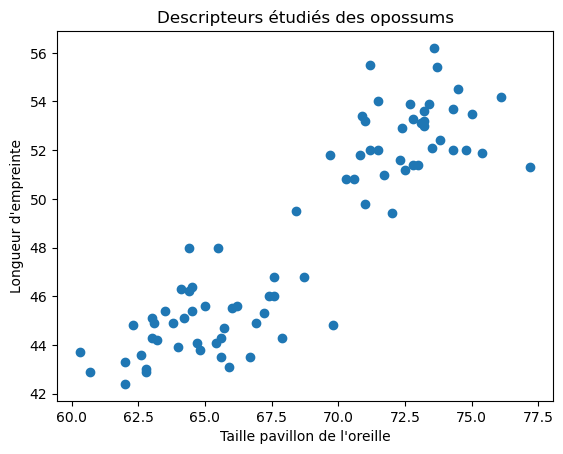

In [5]:
plt.scatter(df["footlgth"].values, df["earconch"].values)
plt.xlabel('Taille pavillon de l\'oreille')
plt.ylabel('Longueur d\'empreinte')
plt.title('Descripteurs étudiés des opossums')
plt.show()

## Task 2: Create a predict model function

**Consigne :** Créez la fonction `predict_model` qui prend en paramètres deux réels `α`, `β` et des données à prédire.
Cette fonction retournera les données prédites relativement aux paramètres de régression d’entrée.

In [6]:
# Definition of the function.
def predict_model(alpha, beta, x):
    return alpha * x + beta

In [7]:
# For example, we can use:
x = np.arange(10)
predict_model(alpha=0.25, beta=0.5, x=x)

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75])

## Task 3: Create a MSE function

**Consigne :** Créez la fonction `mse` qui vous permet de calculer l’erreur quadratique moyenne des prédictions
d’un modèle proposé.

In [8]:
# Definition of the function.
def mse(hx, y):
    return sum((hx - y) ** 2) / len(hx)

## Task 4: Check the results of the MSE function

Now to check the result, we must use our function with the three different models indicated in the subject. Then it will be possible to make a plot of these models.

In [9]:
# Let now use our values (x is the foot length and y is the ear conch).
x = df["footlgth"].values
y = df["earconch"].values

# Let now use our values for the specified parameters:
hx1 = predict_model(alpha=0.25, beta=0.5, x=x)
print("Model (alpha=0.25, beta=0.5): ", mse(hx1, y))

hx2 = predict_model(alpha=0.75, beta=1, x=x)
print("Model (alpha=0.75, beta=1): ", mse(hx2, y))

hx3 = predict_model(alpha=1, beta=2, x=x)
print("Model (alpha=1, beta=2): ", mse(hx3, y))

Model (alpha=0.25, beta=0.5):  964.0679746835439
Model (alpha=0.75, beta=1):  18.65582278481013
Model (alpha=1, beta=2):  489.9464556962026


We can see that the results of each model match the values in the subject. Now we need to display these fields to visually see which model is the most suited for this research.

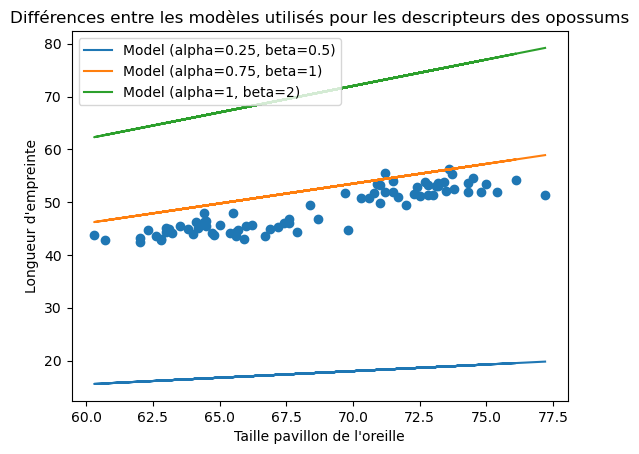

In [10]:
# Display data for each model.
plt.plot(df["footlgth"].values, hx1, label="Model (alpha=0.25, beta=0.5)")
plt.plot(df["footlgth"].values, hx2, label="Model (alpha=0.75, beta=1)")
plt.plot(df["footlgth"].values, hx3, label="Model (alpha=1, beta=2)")
plt.scatter(df["footlgth"].values, df["earconch"].values)
plt.xlabel('Taille pavillon de l\'oreille')
plt.ylabel('Longueur d\'empreinte')
plt.title('Différences entre les modèles utilisés pour les descripteurs des opossums')
plt.legend()
plt.show()

## Task 5: Find best coefficients for the dataset

**Consigne :** Calculez les coefficients `α` et `β` de la fonction linéaire correspondant le mieux à votre jeu de données
dans le sens des moindres carrés (erreur MSE). Vous pouvez vérifier que l’erreur quadratique
moyenne obtenue est plus faible que pour les autres *α* et *β* que vous avez essayé. Vous devriez
obtenir une erreur proche de **3.262**.

Première étape pour déterminer alpha et beta, il nous faut calculer x barre et y barre qui sont donnés par la formule de l'énoncé. Pour cela, on peut utiliser `numpy` pour les trouver :

In [11]:
# Determination of xp and yp.
xp = np.mean(x)
yp = np.mean(y)

Then we must compute alpha and beta using the formula provided in the subject:

In [12]:
# Compute alpha using xp and yp.
alpha = np.sum((x - xp) * (y - yp)) / np.sum((x - xp) ** 2)
print(alpha)

0.838633346199391


Then we can compute beta:

In [13]:
# Compute beta.
beta = yp - alpha * xp
print(beta)

-8.982474300105075


Then we can use our predict and mse functions again to compute these values and found a "perfect" model.

In [14]:
hxf = predict_model(alpha=alpha, beta=beta, x=x)
print("Model (alpha={0}, beta={1}): {2}".format(alpha, beta, mse(hxf, y)))

Model (alpha=0.838633346199391, beta=-8.982474300105075): 3.2625218043774877


Finally, it is possible to display the model.

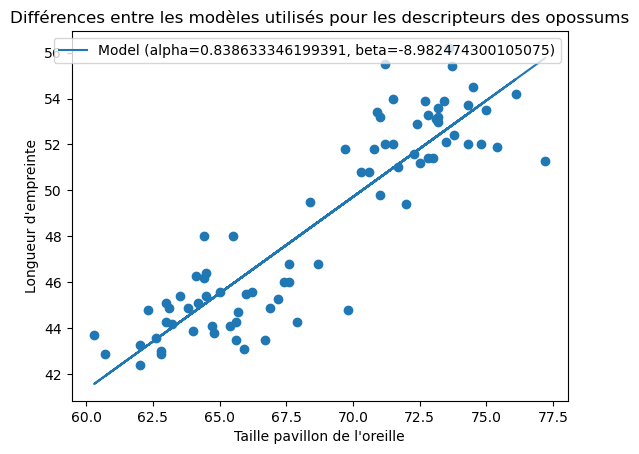

In [15]:
plt.plot(df["footlgth"].values, hxf, label="Model (alpha={0}, beta={1})".format(alpha, beta))
plt.scatter(df["footlgth"].values, df["earconch"].values)
plt.xlabel('Taille pavillon de l\'oreille')
plt.ylabel('Longueur d\'empreinte')
plt.title('Différences entre les modèles utilisés pour les descripteurs des opossums')
plt.legend()
plt.show()

We have finally found a model 🎉🎉

## Task 6: Predict model data with sklearn

**Consigne :** En utilisant la documentation de la librairie, utilisez les fonctions `fit` pour l’apprentissage et
`predict` pour prédire les réponses du modèle sur les données.

In [16]:
# First, we import the library:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# Reshape the data size:
X_train_reshaped = np.array(x).reshape(-1, 1)

In [18]:
# Create a linear regression, fit it and get its results and predictions.
linear = LinearRegression()
linear.fit(X_train_reshaped, y)
skpredict = linear.predict(X_train_reshaped)

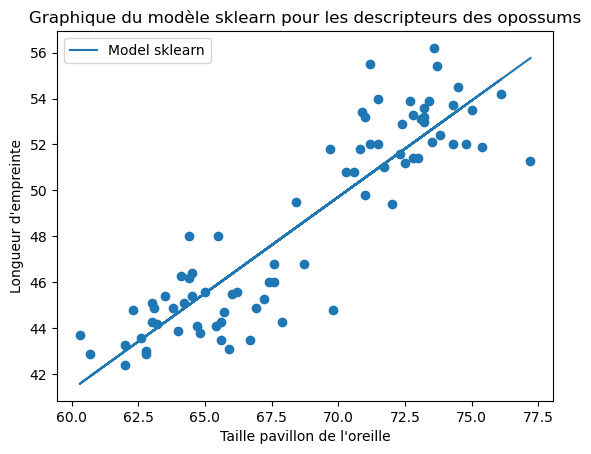

In [19]:
# Visualise the new model.
plt.plot(df["footlgth"].values, skpredict, label="Model sklearn")
plt.scatter(df["footlgth"].values, df["earconch"].values)
plt.xlabel('Taille pavillon de l\'oreille')
plt.ylabel('Longueur d\'empreinte')
plt.title('Graphique du modèle sklearn pour les descripteurs des opossums')
plt.legend()
plt.show()

In [20]:
# Check the squarred error.
mean_squared_error(X_train_reshaped, skpredict)

402.4864655373947

402, this means an error between 14 and 16 if we add the root again to this result, this is not bad.